# DATA MINING CCP


# 1. DATA PREPROCESSING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('loan default train dataset.csv')
df.head()

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,1,27,1.0,Aadhar,504264,820920,2,2,0,0
1,2,48,1.0,Aadhar,728556,831444,6,2,0,0
2,3,30,2.0,VoterID,642936,826092,0,0,0,1
3,4,28,1.0,Aadhar,746556,930924,0,0,0,0
4,5,29,1.0,Aadhar,1139880,1902000,0,0,0,0


In [3]:
df2=df.drop(["education"],axis=1)
df2.head()

,loan_id,age,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,1,27,Aadhar,504264,820920,2,2,0,0
1,2,48,Aadhar,728556,831444,6,2,0,0
2,3,30,VoterID,642936,826092,0,0,0,1
3,4,28,Aadhar,746556,930924,0,0,0,0
4,5,29,Aadhar,1139880,1902000,0,0,0,0


In [4]:
df2.shape

(7000, 9)

In [5]:
df2.isnull().sum()

loan_id             0
age                 0
proof_submitted     0
loan_amount         0
asset_cost          0
no_of_loans         0
no_of_curr_loans    0
last_delinq_none    0
loan_default        0
dtype: int64

In [6]:
df2.isnull().any()

loan_id             False
age                 False
proof_submitted     False
loan_amount         False
asset_cost          False
no_of_loans         False
no_of_curr_loans    False
last_delinq_none    False
loan_default        False
dtype: bool

In [7]:
df2.describe()

,loan_id,age,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
count,7000.000000,7000.000000,7.000000e+03,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000
mean,3500.500000,36.096571,6.633552e+05,9.162998e+05,2.853286,1.371143,0.013286,0.400000
std,2020.870275,7.587700,1.498128e+05,2.144922e+05,5.471932,2.189278,0.114504,0.489933
min,1.000000,21.000000,1.678800e+05,4.733520e+05,0.000000,0.000000,0.000000,0.000000
25%,1750.750000,29.000000,5.777880e+05,7.979010e+05,0.000000,0.000000,0.000000,0.000000
50%,3500.500000,36.000000,6.571080e+05,8.584260e+05,0.000000,0.000000,0.000000,0.000000
75%,5250.250000,43.000000,7.373640e+05,9.576750e+05,3.000000,2.000000,0.000000,1.000000
max,7000.000000,50.000000,1.781376e+06,2.419200e+06,109.000000,33.000000,1.000000,1.000000


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   loan_id           7000 non-null   int64 
 1   age               7000 non-null   int64 
 2   proof_submitted   7000 non-null   object
 3   loan_amount       7000 non-null   int64 
 4   asset_cost        7000 non-null   int64 
 5   no_of_loans       7000 non-null   int64 
 6   no_of_curr_loans  7000 non-null   int64 
 7   last_delinq_none  7000 non-null   int64 
 8   loan_default      7000 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 492.3+ KB


### Checking if data is imbalance and converting it into balanced dataset

In [9]:

value_counts = df2["loan_default"].value_counts()
print(value_counts)

0    4200
1    2800
Name: loan_default, dtype: int64


In [10]:
import imblearn
from collections import Counter


In [11]:
X=df2.drop(["loan_default"],axis=1)
y=df2["loan_default"]

In [12]:
from imblearn.under_sampling import RandomUnderSampler
rs=RandomUnderSampler(random_state=42)

In [13]:
X_res,y_res=rs.fit_resample(X,y)
print("After sampling %s" % Counter(y_res))

After sampling Counter({0: 2800, 1: 2800})


In [14]:
sampled_data = pd.DataFrame(X_res, columns=X.columns)
sampled_data['loan_default'] = y_res

In [15]:
sampled_data

,loan_id,age,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,2857,35,Aadhar,550188,1055736,8,3,0,0
1,3655,33,Aadhar,580188,749052,0,0,0,0
2,2833,39,Aadhar,542748,614076,0,0,0,0
3,5556,32,Aadhar,675108,1807356,0,0,0,0
4,479,41,Aadhar,750156,975600,0,0,0,0
...,...,...,...,...,...,...,...,...,...
5595,6995,40,Aadhar,696156,868584,0,0,0,1
5596,6996,45,Aadhar,930948,1258344,0,0,0,1
5597,6997,41,Aadhar,681108,791040,4,4,0,1
5598,6998,47,Aadhar,627636,720336,35,11,0,1


In [16]:
sampled_data.to_csv('sampled_data.csv', index=False)


### Applied One hot encoding

In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [18]:


df = pd.read_csv("sampled_data.csv")

In [19]:
df.dtypes

loan_id              int64
age                  int64
proof_submitted     object
loan_amount          int64
asset_cost           int64
no_of_loans          int64
no_of_curr_loans     int64
last_delinq_none     int64
loan_default         int64
dtype: object

In [20]:
df["proof_submitted"].unique()

array(['Aadhar', 'VoterID', 'Driving', 'PAN', 'Passport'], dtype=object)

In [21]:
ohe = OneHotEncoder()

In [22]:
feature_arry = ohe.fit_transform(df[["proof_submitted"]]).toarray()

In [23]:
print(feature_arry)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [24]:
feature_labels = ohe.categories_
np.array(feature_labels).ravel()

array(['Aadhar', 'Driving', 'PAN', 'Passport', 'VoterID'], dtype=object)

In [25]:
features=pd.DataFrame(feature_arry, columns = feature_labels)

In [26]:
df1=pd.concat([df, features], axis=1)

In [27]:
df1.head()

,loan_id,age,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default,"(Aadhar,)","(Driving,)","(PAN,)","(Passport,)","(VoterID,)"
0,2857,35,Aadhar,550188,1055736,8,3,0,0,1.0,0.0,0.0,0.0,0.0
1,3655,33,Aadhar,580188,749052,0,0,0,0,1.0,0.0,0.0,0.0,0.0
2,2833,39,Aadhar,542748,614076,0,0,0,0,1.0,0.0,0.0,0.0,0.0
3,5556,32,Aadhar,675108,1807356,0,0,0,0,1.0,0.0,0.0,0.0,0.0
4,479,41,Aadhar,750156,975600,0,0,0,0,1.0,0.0,0.0,0.0,0.0


In [28]:
df1=df1.drop(["proof_submitted"],axis=1)

In [29]:
df1.to_csv('sampled_data.csv', index=False)

### Deciding if outliers should be kept or removed with respect to their relationship with the target class

In [30]:
sampled_data2=pd.read_csv("sampled_data.csv")

In [31]:
sampled_data2.head()

,loan_id,age,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default,"('Aadhar',)","('Driving',)","('PAN',)","('Passport',)","('VoterID',)"
0,2857,35,550188,1055736,8,3,0,0,1.0,0.0,0.0,0.0,0.0
1,3655,33,580188,749052,0,0,0,0,1.0,0.0,0.0,0.0,0.0
2,2833,39,542748,614076,0,0,0,0,1.0,0.0,0.0,0.0,0.0
3,5556,32,675108,1807356,0,0,0,0,1.0,0.0,0.0,0.0,0.0
4,479,41,750156,975600,0,0,0,0,1.0,0.0,0.0,0.0,0.0


In [32]:
def plot_boxplot(df,ft):

    boxplot = sampled_data2.boxplot(column=ft,by="loan_default")
    boxplot.set_title("")

    plt.show()
    
   

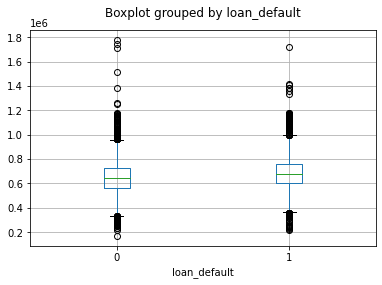

In [33]:
plot_boxplot(sampled_data2,"loan_amount")

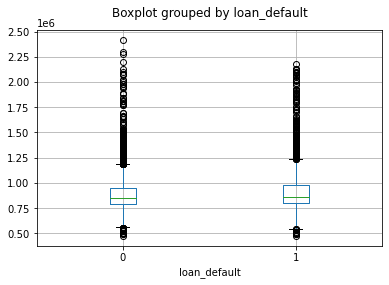

In [34]:
plot_boxplot(sampled_data2,"asset_cost")

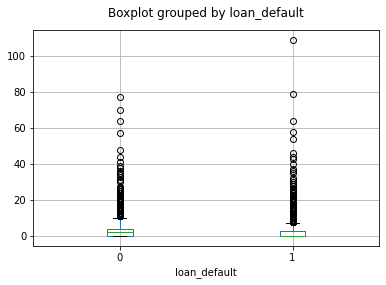

In [35]:
plot_boxplot(sampled_data2,"no_of_loans")

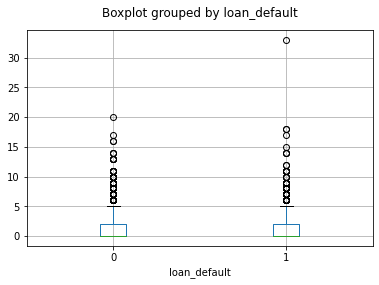

In [36]:
plot_boxplot(sampled_data2,"no_of_curr_loans")

### Removal of outliers

In [37]:


def remove_outliers(df, threshold):
    for column in df.columns:
        # Calculate the quartiles and IQR for the column
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Filter the column to remove outliers
        df = df[(df[column] >= Q1 - threshold * IQR) & (df[column] <= Q3 + threshold * IQR)]

    return df

In [38]:
threshold = 1.5
df3=sampled_data2

# Call the function to remove outliers from the whole DataFrame
df_filtered = remove_outliers(df3, threshold)

In [39]:
print(df_filtered)

      loan_id  age  loan_amount  asset_cost  no_of_loans  no_of_curr_loans  \
0        2857   35       550188     1055736            8                 3   
1        3655   33       580188      749052            0                 0   
2        2833   39       542748      614076            0                 0   
4         479   41       750156      975600            0                 0   
5        3014   47       572988      824460            4                 2   
...       ...  ...          ...         ...          ...               ...   
5590     6981   41       536940      747840            0                 0   
5594     6992   37       639636      984144            0                 0   
5595     6995   40       696156      868584            0                 0   
5597     6997   41       681108      791040            4                 4   
5599     6999   39       654708      793860            0                 0   

      last_delinq_none  loan_default  ('Aadhar',)  ('Driving',)

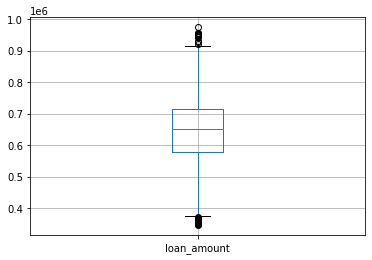

In [40]:
boxplot = df_filtered.boxplot(column="loan_amount")
boxplot.set_title("")

plt.show()
    

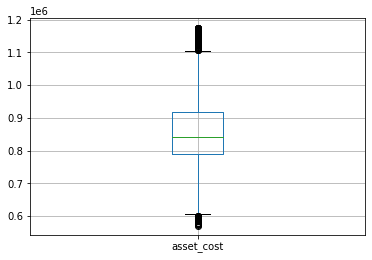

In [41]:
boxplot = df_filtered.boxplot(column="asset_cost")
boxplot.set_title("")

plt.show()

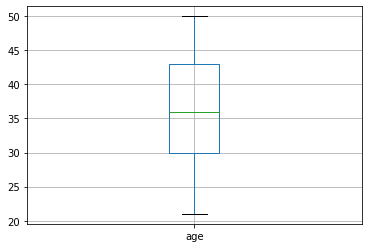

In [42]:
boxplot = df_filtered.boxplot(column="age")
boxplot.set_title("")

plt.show()

In [43]:
threshold = 1.5

df_filtered2 = remove_outliers(df_filtered, threshold)

In [44]:
print(df_filtered2)

      loan_id  age  loan_amount  asset_cost  no_of_loans  no_of_curr_loans  \
1        3655   33       580188      749052            0                 0   
2        2833   39       542748      614076            0                 0   
4         479   41       750156      975600            0                 0   
5        3014   47       572988      824460            4                 2   
7         573   42       772584      941976            0                 0   
...       ...  ...          ...         ...          ...               ...   
5590     6981   41       536940      747840            0                 0   
5594     6992   37       639636      984144            0                 0   
5595     6995   40       696156      868584            0                 0   
5597     6997   41       681108      791040            4                 4   
5599     6999   39       654708      793860            0                 0   

      last_delinq_none  loan_default  ('Aadhar',)  ('Driving',)

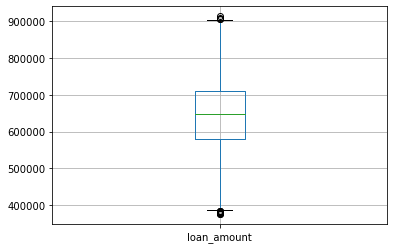

In [45]:
boxplot = df_filtered2.boxplot(column="loan_amount")
boxplot.set_title("")

plt.show()
    

### Saving the cleaned dataset into csv file and separating a few data rows for validation steps

In [46]:
df_filtered2.to_csv('sampled_data.csv', index=False)



In [47]:

data = pd.read_csv('sampled_data.csv')
num_rows_to_remove = 10

# Randomly select rows to remove
removed_rows = data.sample(n=num_rows_to_remove, random_state=42)

# Drop the selected rows from the original DataFrame
data_filtered = data.drop(removed_rows.index)

# Save the modified dataset
data_filtered.to_csv('sampled_data.csv', index=False)

# Save the removed rows
removed_rows.to_csv('validation.csv', index=False)

### Data Visualization

In [48]:
df_filtered2["no_of_loans"].unique()

array([0, 4, 3, 5, 2, 6, 7], dtype=int64)

<AxesSubplot:xlabel='no_of_loans', ylabel='count'>

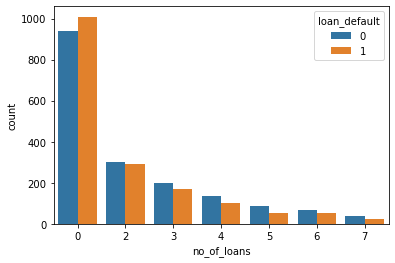

In [49]:

sns.countplot(x='no_of_loans', data=df_filtered2, hue="loan_default")

<AxesSubplot:xlabel='no_of_curr_loans', ylabel='count'>

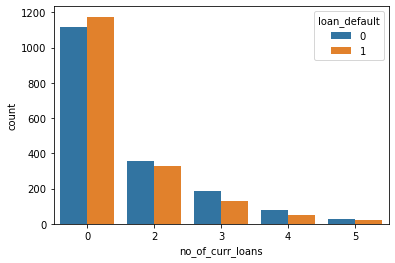

In [50]:
sns.countplot(x='no_of_curr_loans',data=df_filtered2,hue='loan_default')

In [51]:
df_filtered["no_of_curr_loans"].unique()

array([3, 0, 2, 4, 5], dtype=int64)

# 2. Feature Selection

### CORRELATION:

<AxesSubplot:>

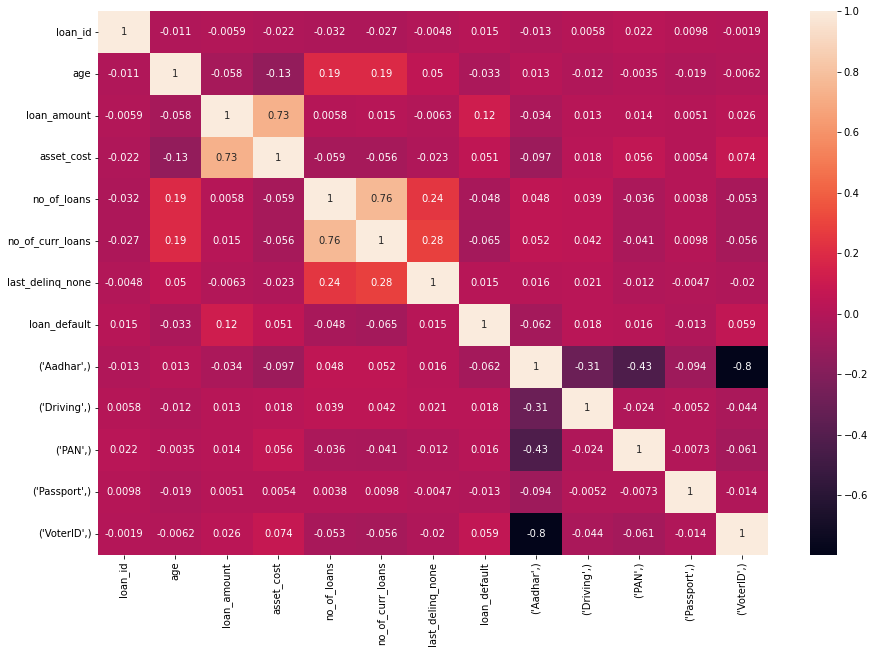

In [52]:
CorrMat=sampled_data2.corr()
plt.figure(figsize=(15,10))

sns.heatmap(CorrMat,annot=True)

### CHI SQUARED TEST

In [53]:

from sklearn.feature_selection import SelectPercentile

from sklearn.feature_selection import SelectKBest, chi2,f_classif

In [54]:
sampled_data2.head()

,loan_id,age,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default,"('Aadhar',)","('Driving',)","('PAN',)","('Passport',)","('VoterID',)"
0,2857,35,550188,1055736,8,3,0,0,1.0,0.0,0.0,0.0,0.0
1,3655,33,580188,749052,0,0,0,0,1.0,0.0,0.0,0.0,0.0
2,2833,39,542748,614076,0,0,0,0,1.0,0.0,0.0,0.0,0.0
3,5556,32,675108,1807356,0,0,0,0,1.0,0.0,0.0,0.0,0.0
4,479,41,750156,975600,0,0,0,0,1.0,0.0,0.0,0.0,0.0


In [55]:
X=sampled_data2.drop(["loan_default"],axis=1)
Y=sampled_data2["loan_default"]

In [56]:
chi2_selector=SelectKBest(f_classif,k=3)
kBest=chi2_selector.fit_transform(X,Y)

In [57]:
selected_features = X.columns[chi2_selector.get_support()]

In [58]:
chi2_scores=pd.DataFrame(list(zip(X.columns,chi2_selector.scores_)),columns=["feature","score"])

In [59]:
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['loan_amount', 'no_of_curr_loans', '('Aadhar',)'], dtype='object')


In [60]:
 chi2_scores

,feature,score
0,loan_id,1.245573
1,age,6.116801
2,loan_amount,79.955283
3,asset_cost,14.353933
4,no_of_loans,12.846898
5,no_of_curr_loans,23.847849
6,last_delinq_none,1.333734
7,"('Aadhar',)",21.929216
8,"('Driving',)",1.847842
9,"('PAN',)",1.485281


### INFORMATION GAIN

In [61]:
from sklearn.feature_selection import mutual_info_classif


In [62]:
X.head()

,loan_id,age,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,"('Aadhar',)","('Driving',)","('PAN',)","('Passport',)","('VoterID',)"
0,2857,35,550188,1055736,8,3,0,1.0,0.0,0.0,0.0,0.0
1,3655,33,580188,749052,0,0,0,1.0,0.0,0.0,0.0,0.0
2,2833,39,542748,614076,0,0,0,1.0,0.0,0.0,0.0,0.0
3,5556,32,675108,1807356,0,0,0,1.0,0.0,0.0,0.0,0.0
4,479,41,750156,975600,0,0,0,1.0,0.0,0.0,0.0,0.0


In [63]:
feature_scores=mutual_info_classif(X,Y,random_state=0)
feature_scores

array([0.        , 0.00438302, 0.00923336, 0.00525722, 0.01210109,
       0.        , 0.        , 0.00982624, 0.00041892, 0.0072607 ,
       0.        , 0.        ])

# 3. Model selection


In [64]:
from sklearn.model_selection import train_test_split


y = sampled_data2['loan_default']
X = sampled_data2[["loan_amount","no_of_curr_loans","('Aadhar',)"]]




from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

# X_train # return dataframe train
print(X_train)

[[ 0.07763981  0.          0.        ]
 [ 0.09701102  0.          0.        ]
 [ 0.01464464  0.         -1.        ]
 ...
 [ 1.07479224  1.          0.        ]
 [-0.64676598  0.          0.        ]
 [-0.97762625  0.          0.        ]]


### SVM

In [65]:
# Instantiate the Support Vector Classifier (SVC)
# svc = SVC(C=1.0, random_state=1, kernel='linear')
svc=SVC()
# Fit the model
svc.fit(X_train, y_train)
# svc.fit(X_train, y_train)

SVC()

In [66]:
# Make the predictions
y_predict = svc.predict(X_test)
 
# # Measure the performance
# print("Accuracy score %.3f" %metrics.accuracy_score(y_test, y_predict))

svc.score(X_test,y_test)

0.5660714285714286

In [67]:
print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.59      0.45      0.51       840
           1       0.55      0.69      0.61       840

    accuracy                           0.57      1680
   macro avg       0.57      0.57      0.56      1680
weighted avg       0.57      0.57      0.56      1680

[[374 466]
 [263 577]]


### Decision Trees

In [68]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
pred=dt.predict(X_test)

In [69]:
dt.score(X_test,y_test)

0.5321428571428571

In [70]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.53      0.59      0.56       840
           1       0.54      0.47      0.50       840

    accuracy                           0.53      1680
   macro avg       0.53      0.53      0.53      1680
weighted avg       0.53      0.53      0.53      1680

[[495 345]
 [441 399]]


### Logistic Regression

In [71]:

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)


print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.56      0.57       840
           1       0.58      0.61      0.60       840

    accuracy                           0.58      1680
   macro avg       0.58      0.58      0.58      1680
weighted avg       0.58      0.58      0.58      1680

[[467 373]
 [325 515]]


In [72]:
logreg.score(X_test,y_test)

0.5845238095238096

In [73]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.56      0.57       840
           1       0.58      0.61      0.60       840

    accuracy                           0.58      1680
   macro avg       0.58      0.58      0.58      1680
weighted avg       0.58      0.58      0.58      1680

[[467 373]
 [325 515]]


# 4. K-Fold cross Validation

### Testing the model on the data we trained:

#### Logistic regression:

In [74]:
cross_val_score(LogisticRegression(), X, y,cv=3)

array([0.49973219, 0.50026781, 0.5       ])

#### SVM:

In [75]:
cross_val_score(SVC(), X, y,cv=3)


array([0.56400643, 0.55115158, 0.55841372])

#### Decision tree:

In [76]:
cross_val_score(DecisionTreeClassifier(),X, y,cv=3)

array([0.52329941, 0.51847884, 0.51607717])

### Testing the model on the data on unseen data:

In [77]:
unseen_data = pd.read_csv('validation.csv')
X1 = pd.DataFrame(unseen_data, columns=["loan_amount","no_of_curr_loans","('Aadhar',)"])
y1 = unseen_data['loan_default']

#### Logistic regression:

In [78]:
cross_val_score(LogisticRegression(), X1, y1,cv=3)


array([0.5       , 0.66666667, 0.66666667])

#### SVM:

In [79]:
cross_val_score(SVC(), X1, y1,cv=3)


array([0.5       , 0.66666667, 0.66666667])

#### Decision tree:

In [80]:
cross_val_score(DecisionTreeClassifier(),X1, y1,cv=3)


array([0.75      , 0.33333333, 0.66666667])